In [ ]:
# Naomi Kaduwela
# Oct 20 2018
# Intro to Java & Python: HW 3

# Exercise 1 – Web API

1. Get one month of historical weather data (i.e. temperatures). In specific: one month of data for 5 distinct locations.

2. Build a data summary table that summaries max, min, and mean values of the temperature during that month for each location selected.

3. Plot a graph that shows your data for the selected locations (to be used as comparative tool).

* The only libraries to use for this exercise are: matplotlib, requests and python built- in data types.

City:     Mean Temp:   Max Temp:    Min Temp:
LA           63.86       66.54        62.14
Chicago      59.9        71.99        42.6
NY           60.17       74.43        41.54
Shanghi      64.0        72.01        58.62
Kransnoyarsk 31.56       41.11        16.35


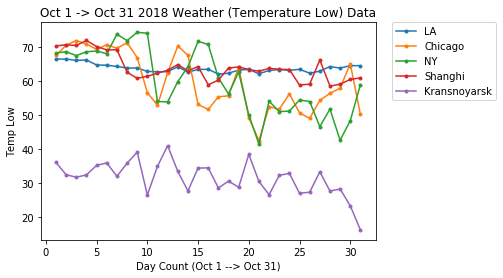

In [6]:
import requests
import matplotlib.pyplot as plt

observation = {}
resultsFull = []

#define required parameters for GET request in repeatable way so that they can be generated in the loop for 
#various times and locations
url = "https://api.darksky.net/forecast/"
key = "0e9ae5a9cd090bea16cc9697f0a1d9cf/"

#select coordinates for 5 locations
coordinateLA = "30.8267,-122.4233,"
coordinateChi = "31.8267,-92.4233,"
coordinateNY = "32.8267,-82.4233,"
coordinateShang = "33.8267,122.4233," #timezone = Shanghai
coordinateKras = "54.8267,90.4233," #timezone = Krasnoyarsk

#define exclude parameters to remove unnecessary attributes
excludeParams = "?exclude=currently,minutely,hourly,flags"
location = []
location.insert(0, coordinateLA)
location.insert(1, coordinateChi)
location.insert(2, coordinateNY)
location.insert(3, coordinateShang)
location.insert(4, coordinateKras)

#array to fill 30 days of time array
times = []
time1 = "1538429800" #GMT: Monday, October 1, 2018 9:36:40 PM              
times.insert(0,time1)

# Calculate epoc time for URL by looping through subtractions of how many seconds are in a day 
for i in range(1,31):
    val = int(times[i-1]) +86400
    times.insert(i,str(val))

#store min, max, mean values for each location to be used later for the min max mean table output
meanTemp = []
minTemp = []
maxTemp = []
    
# Loop to hit the API and Get 1 month of historical weather data (i.e. temperatures): 
# one month of data for 5 distinct locations
tempDict = {}

for i in range(len(location)):
    loc = location[i]
    locationTemps = []

    for j in range(len(times)):
        time = times[j]
        
        tempURL = url+key+loc+str(time)+excludeParams
        response = requests.get(tempURL) #response object
        result = response.json() #dict
        
        timezone = result['timezone']

        for result in result["daily"]["data"] : #daily data info
            time = result["time"]
            temp = result["temperatureLow"]
            locationTemps.append(temp)
    
        tempDict = {'Time': time, 'Timezone':timezone, 'Temp': temp}
        resultsFull.append(tempDict)
        
    meanTemp.append(sum(locationTemps)/len(locationTemps))
    minTemp.append(min(locationTemps))
    maxTemp.append(max(locationTemps))
    

#print(resultsFull) #dictionary

# 2. Build a data summary table that summaries max, min, and mean values of the temperature 
# during that month for each location selected.

# Print table of min/max/mean for each location
for i in range(len(meanTemp)):
    meanTemp[i] = str(round(float(meanTemp[i]),2))
    maxTemp[i] = str(maxTemp[i])
    minTemp[i] = str(minTemp[i])
    
print("City:     Mean Temp:   Max Temp:    Min Temp:")
print("LA           " + meanTemp[0] + "       " + maxTemp[0] + "        " + minTemp[0])
print("Chicago      " + meanTemp[1] + "        " + maxTemp[1] + "        " + minTemp[1])
print("NY           " + meanTemp[2] + "       " + maxTemp[2] + "        " + minTemp[2])
print("Shanghi      " + meanTemp[3] + "        " + maxTemp[3] + "        " + minTemp[3])
print("Kransnoyarsk " + meanTemp[4] + "       " + maxTemp[4] + "        " + minTemp[4])
    

# 3. Plot a graph that shows your data for the selected locations (to be used as comparative tool).

temp={}

plotdata = {
    "LA" : [],
    "Chicago" : [],
    "NY" : [],
    "Shanghi" : [],
    "Kransnoyarsk" : []
}

for i in resultsFull:
    temp = i
    if temp["Timezone"] == "America/Los_Angeles":
        plotdata["LA"].append(temp["Temp"])
    elif temp["Timezone"] == "America/Chicago":
        plotdata["Chicago"].append(temp["Temp"])
    elif temp["Timezone"] == "America/New_York":
        plotdata["NY"].append(temp["Temp"])
    elif temp["Timezone"] == "Asia/Shanghai":
        plotdata["Shanghi"].append(temp["Temp"])
    elif temp["Timezone"] == "Asia/Krasnoyarsk":
        plotdata["Kransnoyarsk"].append(temp["Temp"])
        
#plotdata
for k, v in plotdata.items():
    plt.plot(range(1, len(v) + 1), v, '.-', label=k)
plt.legend()  # To draw legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # anchor ledgend so it doesn't cover graph
plt.xlabel('Day Count (Oct 1 --> Oct 31)')
plt.ylabel('Temp Low')
plt.title('Oct 1 -> Oct 31 2018 Weather (Temperature Low) Data')
plt.show()